In [249]:
# 3D spot finding
from skimage import feature, io, img_as_ubyte, exposure, draw, filters, morphology
import matplotlib.pyplot as plt
import numpy as np
from tifffile import imread, imwrite

img_dir = "/Users/snk218/Dropbox (NYU Langone Health)/mac_files/holtlab/data_and_results/Farida_LINE1/spot_counting/20221030_LINE1"
img_file = "zstack_002.tif"

spot_ch=0

full_stack = io.imread(f"{img_dir}/{img_file}")


In [201]:
full_stack.shape

(33, 5, 900, 600)

In [212]:
spot_stack = full_stack[:,0,:,:]
spot_stack = exposure.rescale_intensity(spot_stack)

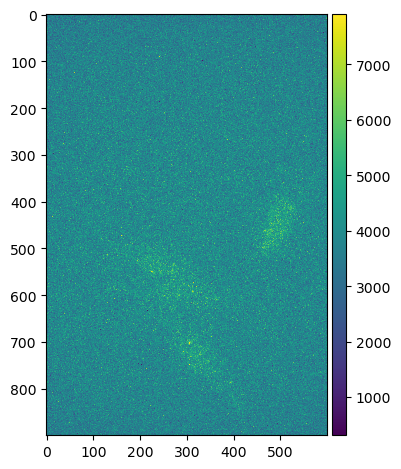

In [252]:
io.imshow(spot_stack[0])

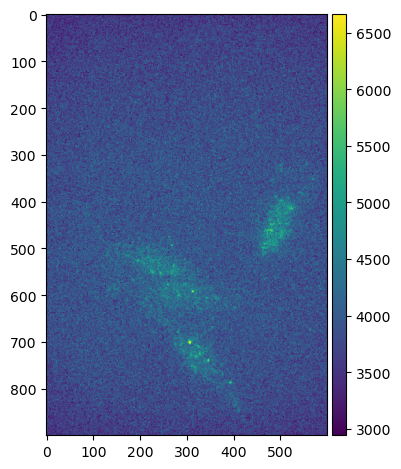

In [256]:
filt_img = filters.median(spot_stack[0], morphology.disk(2))
io.imshow(filt_img)

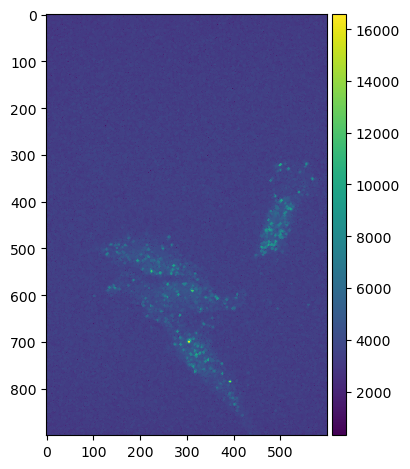

In [283]:
i=7
res = morphology.white_tophat(spot_stack[i], morphology.disk(2))
filt_img2 = spot_stack[i]-res
io.imshow(filt_img2)

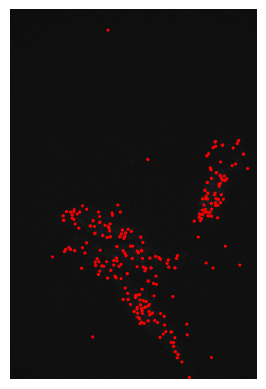

In [299]:
plt.figure() #figsize=(15,15))
ax=plt.gca()

img=spot_stack[i] # sample_cell
#img = sample_cell
#img=img[300:550,400:600]

blobs = feature.blob_log(img, min_sigma=1, max_sigma=3, num_sigma=10, threshold=0.03, overlap=0.5)

for x,y,sigma in blobs:
  # The radius of each blob is approximately 2*sqrt(sigma)
  c = plt.Circle((y, x), 2*np.sqrt(sigma), color="red", linewidth=1, fill=False) 
  ax.add_patch(c)

plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

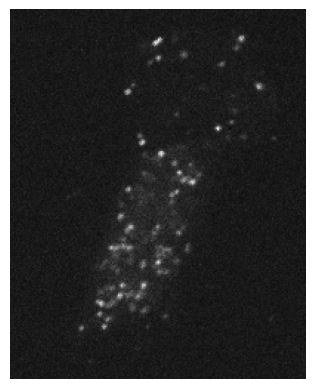

In [297]:
plt.figure() #figsize=(15,15))
ax=plt.gca()

img=spot_stack[i] # sample_cell
#img = sample_cell
img=img[300:550,400:600]

plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

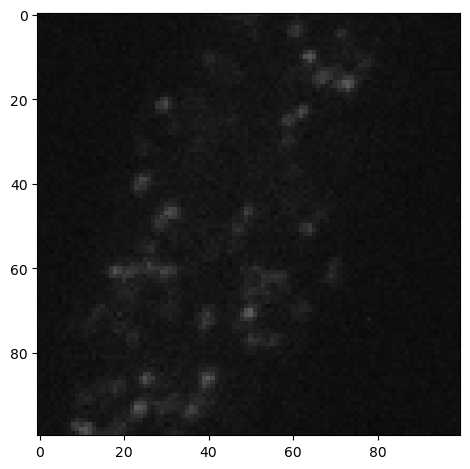

In [238]:
sample_cell = spot_stack[7][400:500,450:550]
io.imshow(sample_cell)

In [199]:
blobs = feature.blob_log(spot_stack, min_sigma=1, max_sigma=3, num_sigma=10, threshold=0.01, overlap=0.5)
print(len(blobs))
# on each slice, label blobs: combine as one movie
labels_stack=np.zeros_like(spot_stack)
for p,r,c,sigma in blobs:  

    radius=2*np.sqrt(sigma)
    
    # draw circle on image
    rr, cc = draw.circle_perimeter(int(r), int(c), int(radius), 
                                   method='bresenham', shape=labels_stack[0].shape)
    
    labels_stack[int(p), rr, cc] = 65535
    
sample_cell_ij_stack=np.stack([spot_stack, labels_stack], axis=1)

imwrite(f"{img_dir}/{img_file[:-4]}-marked-blobs.tif",
        sample_cell_ij_stack,
        imagej=True,
        metadata={'axes': 'ZCYX'}
        )

1465
